In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../kdd2004.csv')

In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [7]:
df.target = df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [8]:
X = df.drop('target', axis = 1)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73'],
      dtype='object')

In [9]:
y = df.target
y.unique()

array([0, 1])

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [16]:
y_predict_train = rf.predict_proba(X_train)[:,1]
y_predict_test = rf.predict_proba(X_test)[:,1]

In [17]:
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [18]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]


# ROC-AUC

In [19]:
import sklearn.metrics
import imblearn.metrics

In [20]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
?roc_auc_score

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
     

In [24]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [25]:
print(f"""
ROC-AUC test baseline scores: {roc_auc_score(y_test, y_test_base)}
ROC-AUC test rf scores: {roc_auc_score(y_test, rf.predict(X_test))}
ROC-AUC test lr scores: {roc_auc_score(y_test, lr.predict(X_test))}
      """)


ROC-AUC test baseline scores: 0.5
ROC-AUC test rf scores: 0.7962847545497992
ROC-AUC test lr scores: 0.8553824293580994
      


In [26]:
from sklearn.metrics import RocCurveDisplay

In [27]:
?RocCurveDisplay

Init signature:
RocCurveDisplay(
    *,
    fpr,
    tpr,
    roc_auc=None,
    estimator_name=None,
    pos_label=None,
)
Docstring:     
ROC Curve visualization.

It is recommend to use
:func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
:func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
fpr : ndarray
    False positive rate.

tpr : ndarray
    True positive rate.

roc_auc : float, default=None
    Area under ROC curve. If None, the roc_auc score is not shown.

estimator_name : str, default=None
    Name of estimator. If None, the estimator name is not shown.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the roc auc
    metrics. By default, `estimators.classes_[1]` is considered
    as the positive class.

    .. versionadded:: 0.24



In [28]:
dir(RocCurveDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'from_estimator',
 'from_predictions',
 'plot']

In [29]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [30]:
dir(RocCurveDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'from_estimator',
 'from_predictions',
 'plot']

In [31]:
?RocCurveDisplay.from_estimator

Signature:
RocCurveDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    sample_weight=None,
    drop_intermediate=True,
    response_method='auto',
    pos_label=None,
    name=None,
    ax=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Create a ROC Curve display from an estimator.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

drop_intermediate : bool, default=True
    Whether to drop some suboptimal thresholds which would not appear
    on a plotted ROC curve. This is useful in order to create lighter
    ROC curves.

response_method : {'predict_proba', 'decision_funct

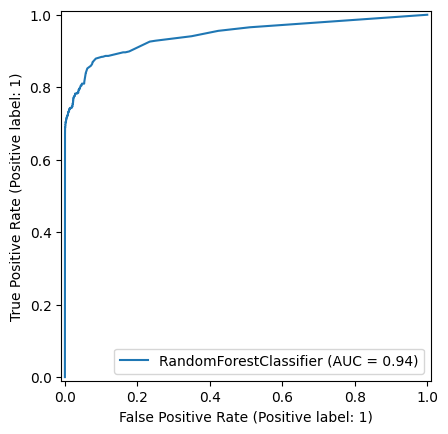

In [32]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [33]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [34]:
dir(RocCurveDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'from_estimator',
 'from_predictions',
 'plot']

In [35]:
?RocCurveDisplay.from_estimator

Signature:
RocCurveDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    sample_weight=None,
    drop_intermediate=True,
    response_method='auto',
    pos_label=None,
    name=None,
    ax=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Create a ROC Curve display from an estimator.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

drop_intermediate : bool, default=True
    Whether to drop some suboptimal thresholds which would not appear
    on a plotted ROC curve. This is useful in order to create lighter
    ROC curves.

response_method : {'predict_proba', 'decision_funct

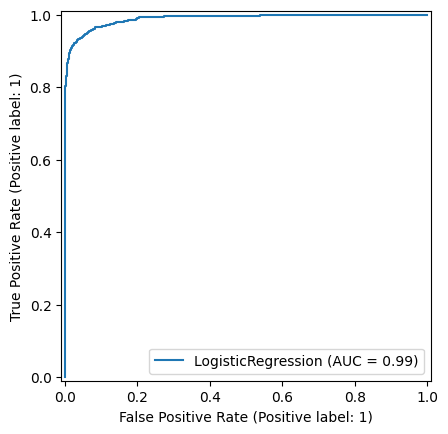

In [37]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [38]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colorizer',
 'ColorizingArtist',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_ColorizerInterface',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_a

In [39]:
?plt.gca

Signature: plt.gca() -> 'Axes'
Docstring:
Get the current Axes.

If there is currently no Axes on this Figure, a new one is created
using `.Figure.add_subplot`.  (To test whether there is currently an
Axes on a Figure, check whether ``figure.axes`` is empty.  To test
whether there is currently a Figure on the pyplot figure stack, check
whether `.pyplot.get_fignums()` is empty.)

Notes
-----

.. note::

    This is the :ref:`pyplot wrapper <pyplot_interface>` for `.Figure.gca`.
File:      ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py
Type:      function

In [40]:
help(plt.gca)

Help on function gca in module matplotlib.pyplot:

gca() -> 'Axes'
    Get the current Axes.
    
    If there is currently no Axes on this Figure, a new one is created
    using `.Figure.add_subplot`.  (To test whether there is currently an
    Axes on a Figure, check whether ``figure.axes`` is empty.  To test
    whether there is currently a Figure on the pyplot figure stack, check
    whether `.pyplot.get_fignums()` is empty.)
    
    Notes
    -----
    
    .. note::
    
        This is the :ref:`pyplot wrapper <pyplot_interface>` for `.Figure.gca`.



In [ ]:
ax = plt.gca
rf_disp.pl

In [44]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [45]:
dir(RocCurveDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'from_estimator',
 'from_predictions',
 'plot']

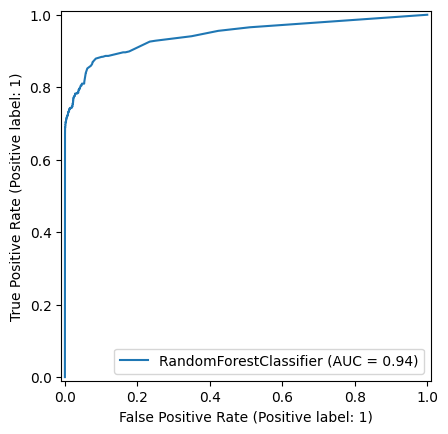

In [47]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [48]:
help(rf_disp.plot)

Help on method plot in module sklearn.metrics._plot.roc_curve:

plot(ax=None, *, name=None, plot_chance_level=False, chance_level_kw=None, despine=False, **kwargs) method of sklearn.metrics._plot.roc_curve.RocCurveDisplay instance
    Plot visualization.
    
    Extra keyword arguments will be passed to matplotlib's ``plot``.
    
    Parameters
    ----------
    ax : matplotlib axes, default=None
        Axes object to plot on. If `None`, a new figure and axes is
        created.
    
    name : str, default=None
        Name of ROC Curve for labeling. If `None`, use `estimator_name` if
        not `None`, otherwise no labeling is shown.
    
    plot_chance_level : bool, default=False
        Whether to plot the chance level.
    
        .. versionadded:: 1.3
    
    chance_level_kw : dict, default=None
        Keyword arguments to be passed to matplotlib's `plot` for rendering
        the chance level line.
    
        .. versionadded:: 1.3
    
    despine : bool, default=Fals

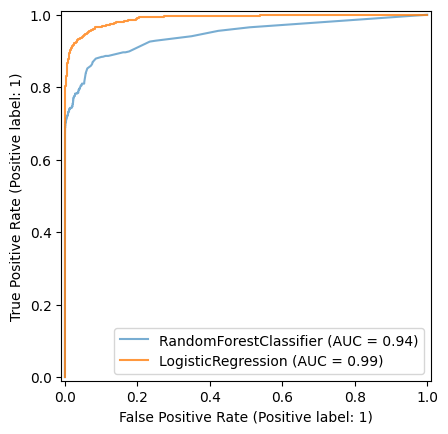

In [54]:
ax = plt.gca()
rf_disp.plot(ax = ax, alpha= 0.6)
lr_disp.plot(ax = ax, alpha=0.8)

In [56]:
help(RocCurveDisplay.from_estimator)

Help on method from_estimator in module sklearn.metrics._plot.roc_curve:

from_estimator(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', pos_label=None, name=None, ax=None, plot_chance_level=False, chance_level_kw=None, despine=False, **kwargs) method of builtins.type instance
    Create a ROC Curve display from an estimator.
    
    Parameters
    ----------
    estimator : estimator instance
        Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
        in which the last estimator is a classifier.
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Input values.
    
    y : array-like of shape (n_samples,)
        Target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    drop_intermediate : bool, default=True
        Whether to drop some suboptimal thresholds which would not appear
        on a plotted ROC curve. This is useful in or

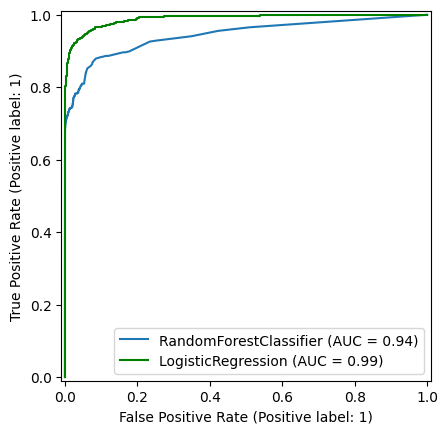

In [60]:
ax1 = plt.gca()
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax1)
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax1, c='green')

In [61]:
import yellowbrick.classifier

In [62]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [63]:
from yellowbrick.classifier import ROCAUC

In [64]:
?ROCAUC

Init signature:
ROCAUC(
    estimator,
    ax=None,
    micro=True,
    macro=True,
    per_class=True,
    binary=False,
    classes=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Receiver Operating Characteristic (ROC) curves are a measure of a
classifier's predictive quality that compares and visualizes the tradeoff
between the models' sensitivity and specificity. The ROC curve displays
the true positive rate on the Y axis and the false positive rate on the
X axis on both a global average and per-class basis. The ideal point is
therefore the top-left corner of the plot: false positives are zero and
true positives are one.

This leads to another metric, area under the curve (AUC), a computation
of the relationship between false positives and true positives. The higher
the AUC, the better the model generally is. However, it is also important
to inspect the "steepness" of the curve, as this describes the
maximization of the true pos

In [65]:
help(ROCAUC)

Help on class ROCAUC in module yellowbrick.classifier.rocauc:

class ROCAUC(yellowbrick.classifier.base.ClassificationScoreVisualizer)
 |  ROCAUC(estimator, ax=None, micro=True, macro=True, per_class=True, binary=False, classes=None, encoder=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Receiver Operating Characteristic (ROC) curves are a measure of a
 |  classifier's predictive quality that compares and visualizes the tradeoff
 |  between the models' sensitivity and specificity. The ROC curve displays
 |  the true positive rate on the Y axis and the false positive rate on the
 |  X axis on both a global average and per-class basis. The ideal point is
 |  therefore the top-left corner of the plot: false positives are zero and
 |  true positives are one.
 |  
 |  This leads to another metric, area under the curve (AUC), a computation
 |  of the relationship between false positives and true positives. The higher
 |  the AUC, the better the model generally is. However, it 

In [70]:
plt.rcParams['font.family'] = 'DejaVu Sans'

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


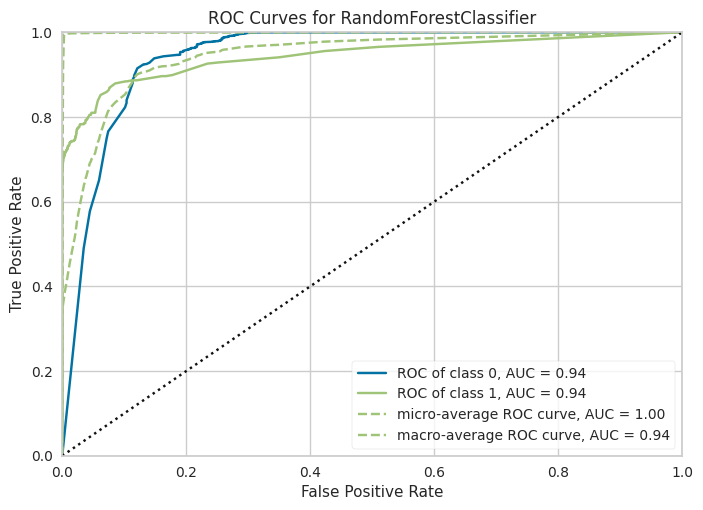

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [71]:
ax2 = plt.gca()
visualization_rf = ROCAUC(rf, classes=[0,1])
visualization_rf.fit(X_train, y_train)
visualization_rf.score(X_test, y_test)
visualization_rf.show(ax=ax2)

In [69]:
help(plt.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  RcParams(*args, **kwargs)
 |  
 |  A dict-like key-value store for config parameters, including validation.
 |  
 |  Validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`.
 |  
 |  The list of rcParams is:
 |  
 |  - _internal.classic_mode
 |  - agg.path.chunksize
 |  - animation.bitrate
 |  - animation.codec
 |  - animation.convert_args
 |  - animation.convert_path
 |  - animation.embed_limit
 |  - animation.ffmpeg_args
 |  - animation.ffmpeg_path
 |  - animation.frame_format
 |  - animation.html
 |  - animation.writer
 |  - axes.autolimit_mode
 |  - axes.axisbelow
 |  - axes.edgecolor
 |  - axes.facecolor
 |  - axes.formatter.limits
 |  - axes.formatter.min_exponent
 |  - axes.formatter.offset_threshold
 |  - axes.formatter.use_locale
 |  - axes.formatter.use_mathtext
 |  - axes.formatter.useoffset
 |  - axes.grid
 |  - axes.gr

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


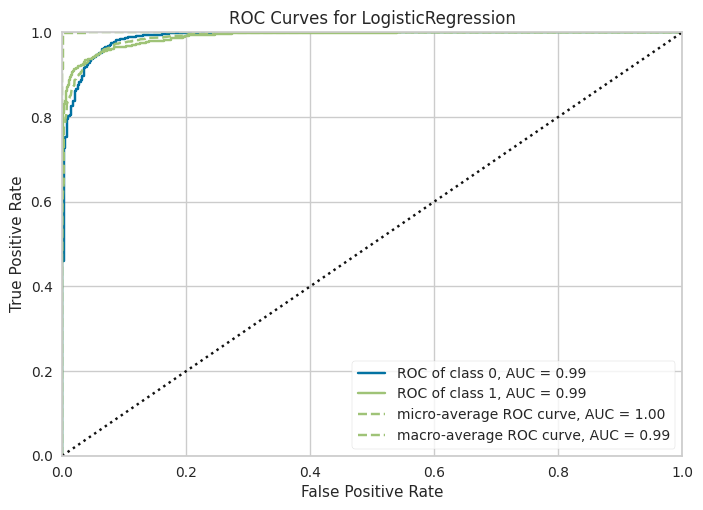

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
visualization_lr = ROCAUC(lr, classes=[0,1])
visualization_lr.fit(X_train, y_train)
visualization_lr.score(X_test, y_test)
visualization_lr.show(ax=ax2)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


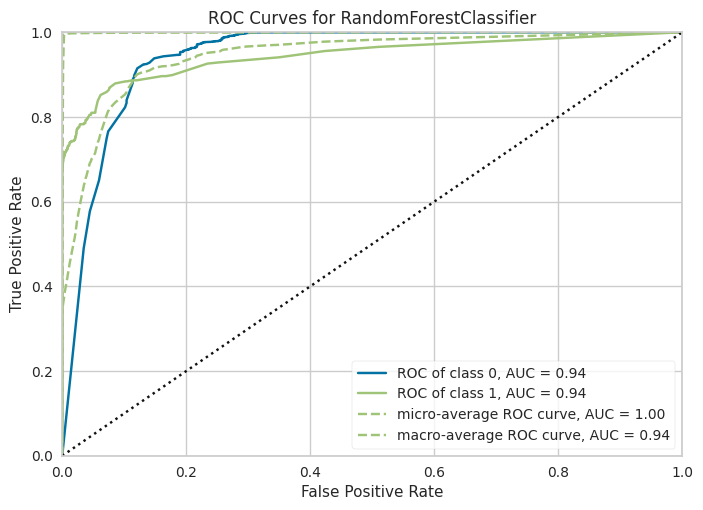

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


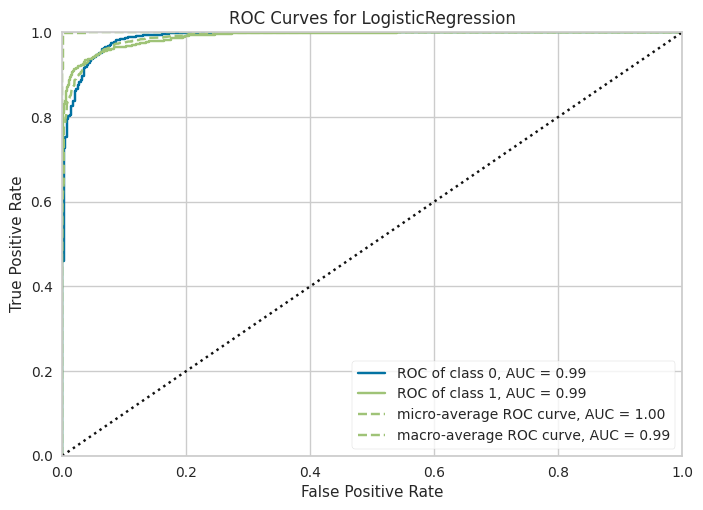

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
ax2 = plt.gca()
visualization_rf = ROCAUC(rf, classes=[0,1])
visualization_rf.fit(X_train, y_train)
visualization_rf.score(X_test, y_test)
visualization_rf.show(ax=ax2)

visualization_lr = ROCAUC(lr, classes=[0,1])
visualization_lr.fit(X_train, y_train)
visualization_lr.score(X_test, y_test)
visualization_lr.show(ax=ax2)